In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
CHUNK = 1024             
AMPLITUDE_LIMIT = 1000   
RATE = 44100             

In [5]:
t = np.arange(CHUNK) / RATE
signal = 200*np.sin(2*np.pi*440*t) + 100*np.sin(2*np.pi*880*t) + 50*np.random.randn(CHUNK)
signal = np.clip(signal, -AMPLITUDE_LIMIT, AMPLITUDE_LIMIT)

In [13]:
signal

array([ 30.19543845,  93.55959718, 125.99503696, ..., 272.82664239,
       247.04315134, 313.63117392], shape=(1024,))

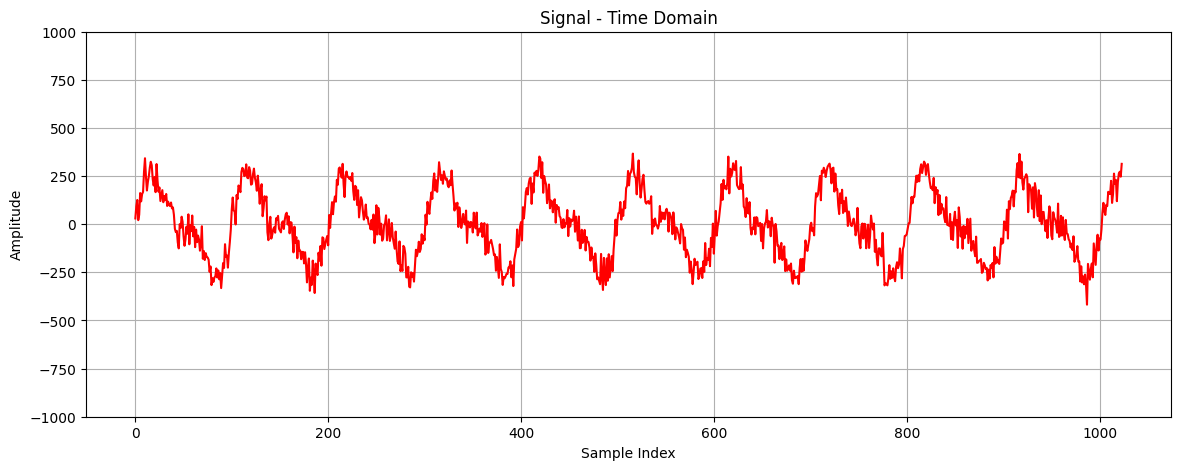

In [6]:
plt.figure(figsize=(14, 5))
plt.plot(signal, color='red')
plt.title("Signal - Time Domain")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.ylim(-AMPLITUDE_LIMIT, AMPLITUDE_LIMIT)
plt.grid(True)
plt.show()

In [10]:
def Fft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    freqs = np.arange(N) / N * RATE
    return freqs, X

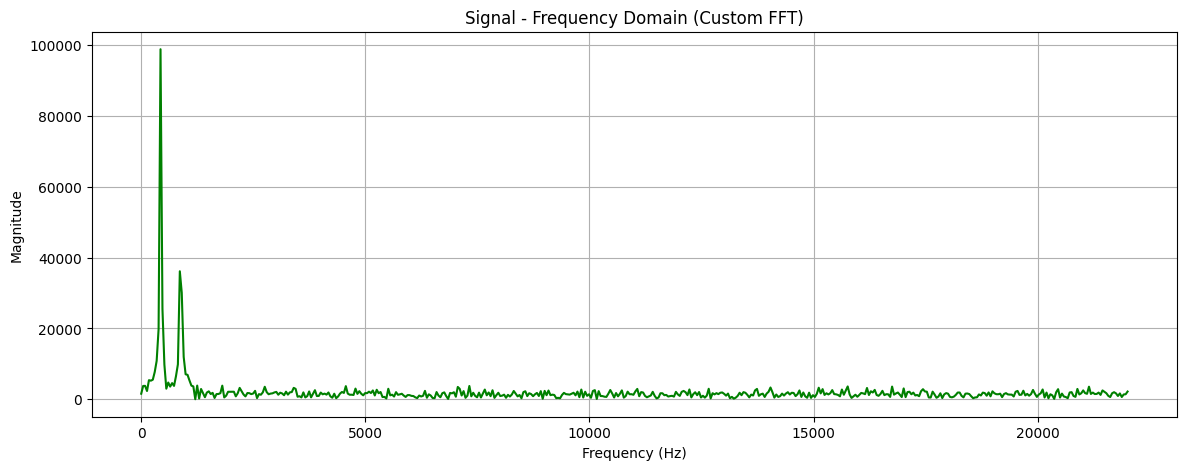

In [11]:
freqs, X_custom = Fft(signal)
magnitude_custom = np.abs(X_custom)

plt.figure(figsize=(14, 5))
plt.plot(freqs[:CHUNK//2], magnitude_custom[:CHUNK//2], color='green')
plt.title("Signal - Frequency Domain (Custom FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

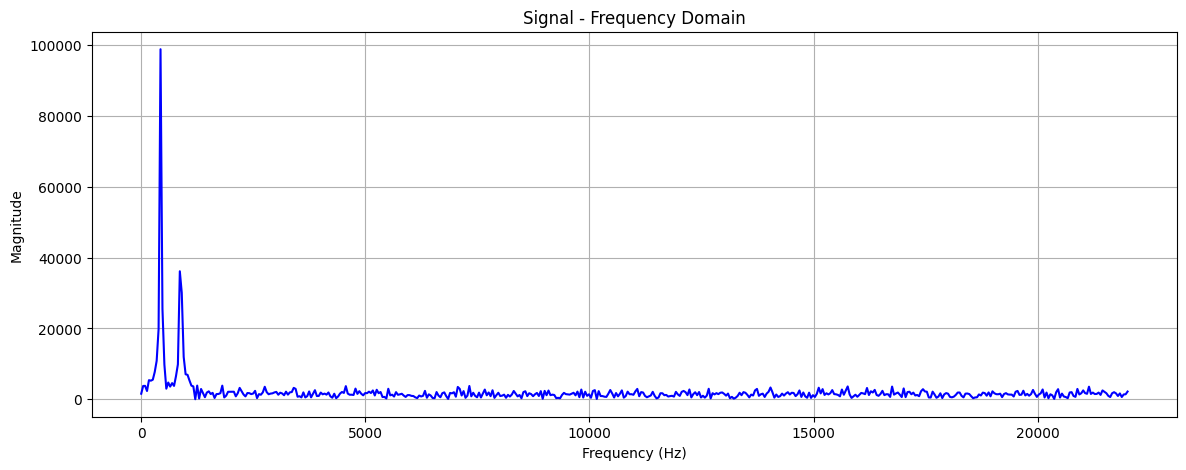

In [7]:
fft_signal = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(len(signal), 1/RATE)
magnitude = np.abs(fft_signal)

plt.figure(figsize=(14, 5))
plt.plot(fft_freqs[:CHUNK//2], magnitude[:CHUNK//2], color='blue')
plt.title("Signal - Frequency Domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()